<a href="https://colab.research.google.com/github/sidd272002/EDA-on-Zomato-Bangalore-Restaurant-Dataset/blob/main/CA2DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CONTINUOUS ASSESSMENT 2
**NAME** : SIDDHI A. NIVALE

**CLASS** : SYCS - A ROLL NO : 6572 

**SUB** : DATA SCIENCE

**UNDER** **GUIDANCE** **OF** : SANJANA BHANGALE

**TOPIC** : EDA ON ZOMATO BANGALORE RESTAURANTS


---



*Exploratory Data Analysis(EDA) is a method of uncovering important relationships between the variables by using Graphs, plots, and tables.*

*It is a very useful technique especially when you are working with the large unknown dataset. It allows you to investigate the interesting relationships between the variables, study the different subsets of data to unlock the different patterns in the data.*







# **ABOUT** **DATASET**

Bangalore city is the largest IT hub of India and so most of the people here depend on restaurant foods.Zomato is an Indian restaurant search and discovery service founded in 2008 by Deepinder Goyal and Pankaj Chaddah. It currently operates in 24 countries. The dataset provides general information like Location, Ratings, Cuisine, Cost etc. of more than 50,000 restaurants in Bangalore which can help in analyzing the various factors that influence the popularity of the restaurants.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### IMPORTING REQUIRED LIBRARIES

In [ ]:
#import the libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### READING THE DATA

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/zomato.csv")
df.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### UNDERSTANDING THE DATASET

we will start with basic data understanding by describing the data ,their structure & by checking the data types of the columns in which we are interested to work with.

Here,
Pandas .**size**, .**shape** and .**ndim** .**columns** .**dtypes** are used to return size, shape ,dimensions ,column names and their data types  of our dataset.

In [ ]:
df.shape

(51717, 17)

In [ ]:
df.size

879189

In [ ]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

Only the variable **votes** is read as an **integer**, remaining 16 columns are read as objects. So the variables like rating, approx_cost(for two people) should be changed to integer in the next phase if we want to perform any analysis on them.

# **CLEANING and DATA PREPARATION**

### In this section, we will perform some of the basic data cleaning techniques like checking for duplicate values & handling missing values, eliminating irrelevant values,..etc.

###Apart from data cleaning, we will perform some of the manipulation techniques like changing the data type of the variables, dropping unwanted variables and renaming the columns for convenience and requirements.

Pandas **df.info()** function is used to get a concise summary of our dataset. It comes really handy when doing exploratory analysis of the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In order to get a quick overview of the dataset we can also use **verbose** parameter and set it to False.

In [ ]:
df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Columns: 17 entries, url to listed_in(city)
dtypes: int64(1), object(16)
memory usage: 6.7+ MB


# Dropping Duplicates

In [ ]:
#check for any duplicate values
df.drop_duplicates(inplace=True)
df.shape


(51717, 17)

There are no duplicate values present in this dataset.

In [ ]:
#check for missing values
pd.DataFrame(round(df.isnull().sum()/df.shape[0] * 100,3), columns = ["Missing"])

,Missing
url,0.000
address,0.000
name,0.000
online_order,0.000
book_table,0.000
rate,15.034
votes,0.000
phone,2.336
location,0.041
rest_type,0.439


There are few columns which contains nulll values as seen above.
To simplify the analysis, we will drop some of the columns that are not very useful for our analysis like url, address ,phone,..etc

In [ ]:
#dropping irrelevant columns
df = df.drop(['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list'], axis = 1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [ ]:
#Remove the NaN values from the dataset
# dropna() is use to delete the row from dataset which contains atleast 1 null value
df.isnull().sum()
df.dropna(how='any',inplace=True)
df.info()
print(df.shape)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 43533 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         43533 non-null  object
 1   online_order                 43533 non-null  object
 2   book_table                   43533 non-null  object
 3   rate                         43533 non-null  object
 4   votes                        43533 non-null  int64 
 5   location                     43533 non-null  object
 6   rest_type                    43533 non-null  object
 7   cuisines                     43533 non-null  object
 8   approx_cost(for two people)  43533 non-null  object
 9   listed_in(type)              43533 non-null  object
 10  listed_in(city)              43533 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.0+ MB
(43533, 11)


From this we can conclude that out of 51,709 rows 8184 rows have null value in it

In [ ]:
#Renaming few columns for convenience
df.rename(columns={"approx_cost(for two people)": "cost_two", "listed_in(type)":"service_type", "listed_in(city)":"serve_to"}, inplace = True)
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost_two', 'service_type', 'serve_to'],
      dtype='object')

# Cleaning Cost Column

As we have seen earlier that the variable **cost_two** has data type **object** which we need to convert to **float**/ **int** so that we can analyze it later.



In [ ]:
df['cost_two'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

As from above we can see because of the presence of a comma in between the numbers.eg. 2,500 we can't simply convert it into float.

So, we are creating handlecomma() function to remove the comma with nothing and then convert to float.

In [ ]:
#removing comma from cost_two column
def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '')
        return float(value)
    else:
        return float(value)
    
df['cost_two'] = df['cost_two'].apply(handlecomma)
df['cost_two'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130., 1700., 1400., 1350., 2200., 2000., 1800., 1900.,
        180.,  330., 2500., 2100., 3000., 2800., 3400.,   50.,   40.,
       1250., 3500., 4000., 2400., 2600., 1450.,   70., 3200.,  560.,
        240.,  360., 6000., 1050., 2300., 4100.,  120., 5000., 3700.,
       1650., 2700., 4500.])

# Cleaning Rate Column

In [ ]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
#simplifying rate column
def handlerate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
    
df['rate'] = df['rate'].apply(handlerate)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

 
### Filling null values with mean value


In [ ]:
# Count of null values present in rate column
print("Count of null values in rate column:",df['rate'].isnull().sum())
df['rate'].fillna(df['rate'].mean(),inplace=True)
print("Count of null values in rate column:",df['rate'].isnull().sum())


Count of null values in rate column: 2270
Count of null values in rate column: 0


# Simplifying Rest type Column

In [ ]:
# Printing the count of each value
rest_types = df['rest_type'].value_counts(ascending  = False)
rest_types

Quick Bites                   15011
Casual Dining                  9878
Cafe                           3491
Dessert Parlor                 1925
Delivery                       1777
                              ...  
Cafe, Food Court                  2
Dessert Parlor, Kiosk             2
Dessert Parlor, Food Court        2
Food Court, Beverage Shop         2
Quick Bites, Kiosk                1
Name: rest_type, Length: 87, dtype: int64

In [ ]:
# Printing the value of rest_type less than 1000
rest_types_lessthan1000=rest_types[rest_types<1000]
print(rest_types_lessthan1000)


Bakery                        775
Beverage Shop                 702
Bar                           650
Food Court                    525
Bar, Casual Dining            410
                             ... 
Cafe, Food Court                2
Dessert Parlor, Kiosk           2
Dessert Parlor, Food Court      2
Food Court, Beverage Shop       2
Quick Bites, Kiosk              1
Name: rest_type, Length: 80, dtype: int64


Assigning the values which is less than 1000 to other

In [ ]:
#simplifying rest type column
rest_types_lessthan1000 = rest_types[rest_types<1000]

def handle_rest_type(value):
    if(value in rest_types_lessthan1000):
        return 'others'
    else:
        return value
        
df['rest_type'] = df['rest_type'].apply(handle_rest_type)
df['rest_type'].value_counts()

Quick Bites           15011
Casual Dining          9878
others                 8870
Cafe                   3491
Dessert Parlor         1925
Delivery               1777
Takeaway, Delivery     1458
Casual Dining, Bar     1123
Name: rest_type, dtype: int64

#simplifying location column

In [ ]:
location = df['location'].value_counts(ascending=False)
print(location)

BTM                      4210
Koramangala 5th Block    2358
HSR                      2102
Indiranagar              1889
JP Nagar                 1842
                         ... 
West Bangalore              5
Yelahanka                   4
Rajarajeshwari Nagar        2
Peenya                      1
Nagarbhavi                  1
Name: location, Length: 92, dtype: int64


In [ ]:
#Assigning the values which is less than 300 to other
location = df['location'].value_counts(ascending  = False)
 
location_lessthan300 = location[location<300]
 
 
 
def handle_location(value):
    if(value in location_lessthan300):
        return 'others'
    else:
        return value
        
df['location'] = df['location'].apply(handle_location)
df['location'].value_counts()

others                   4635
BTM                      4210
Koramangala 5th Block    2358
HSR                      2102
Indiranagar              1889
JP Nagar                 1842
Jayanagar                1709
Whitefield               1679
Marathahalli             1470
Bannerghatta Road        1314
Koramangala 6th Block    1088
Brigade Road             1084
Koramangala 7th Block    1084
Bellandur                1063
Koramangala 1st Block     964
Electronic City           955
Sarjapur Road             907
Ulsoor                    901
Koramangala 4th Block     864
MG Road                   818
Banashankari              805
Kalyan Nagar              742
Malleshwaram              657
Basavanagudi              628
Richmond Road             626
Residency Road            607
Brookefield               579
Frazer Town               574
Church Street             550
New BEL Road              521
Kammanahalli              517
Lavelle Road              493
Rajajinagar               487
Banaswadi 

# Now our Dataset is ready for the next step!!! i.e. Visualization

In [ ]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_two,service_type,serve_to
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


**Final** **Check**

In [ ]:
df.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost_two        0
service_type    0
serve_to        0
dtype: int64

# Data is Clean, Lets Jump To VISUALIZATION

---



## **1)	In which area most of the restaurants are located ?**

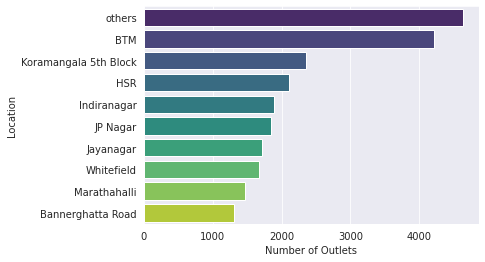

In [ ]:
sns.set_style('darkgrid')
ch=df['location'].value_counts()[:10]
sns.barplot(x=ch,y=ch.index,palette='viridis')
plt.xlabel('Number of Outlets')
plt.ylabel('Location')
plt.show()

Most of the restaurants are located in BTM Layout area (4750 restaurants), makes it one of the most popular residential and commercial places in Bangalore.

## **2) Next let’s see  in which area most of the restaurants are listed in or deliver to a particular Location**

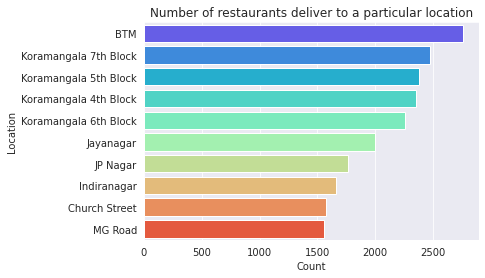

In [ ]:
sns.set_style('darkgrid')
ch=df['serve_to'].value_counts()[:10]
sns.barplot(x=ch,y=ch.index,data=df,palette='rainbow')
plt.title("Number of restaurants deliver to a particular location")
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

As expected most of the restaurants deliver to BTM Layout because this area is home to over 4750 restaurants.

 Even though Koramangala 7th Block doesn’t have many restaurants, it stands second in terms of the number of restaurants that deliver to this location.

# **3) Most In-demand Restaurant types**

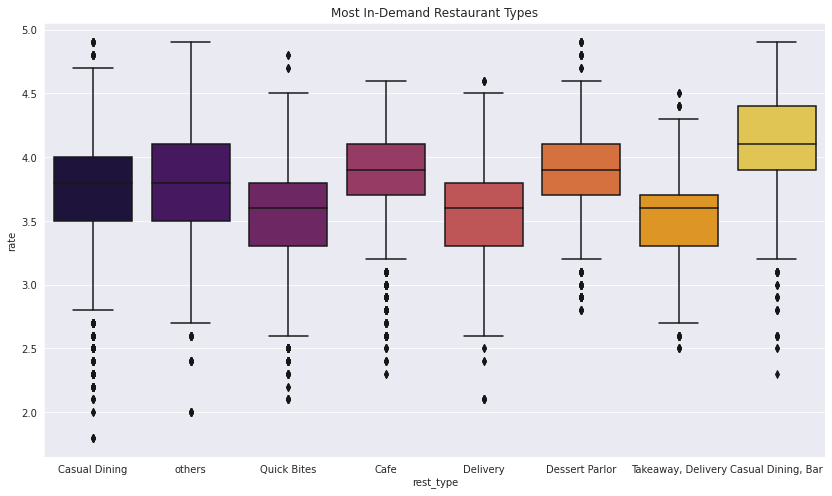

In [ ]:
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'rest_type', y = 'rate', data = df, palette = 'inferno')
plt.title("Most In-Demand Restaurant Types")

plt.show()


As from the above we can say that people loved to have Casual Dining as well as bar type restaurats has its has the maximum average ratings than other types. 

# 4) What is the highest number of rating given by customers? 



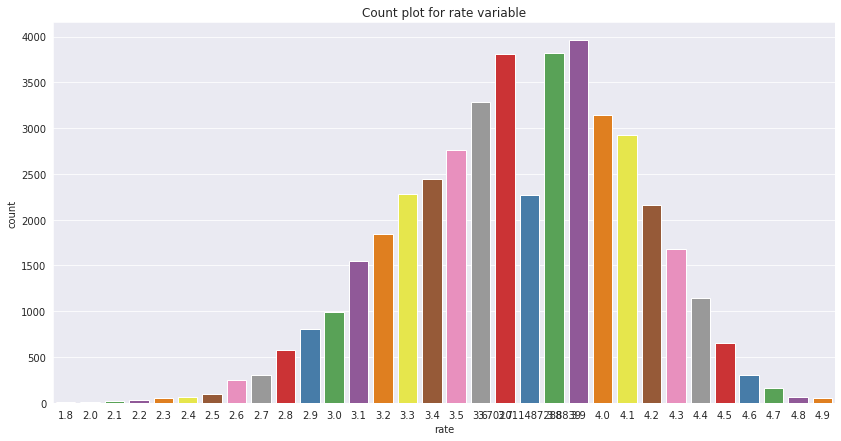

In [ ]:
#plot the count of rating.
plt.rcParams['figure.figsize'] = 14,7
sns.countplot(df["rate"], palette="Set1")
plt.title("Count plot for rate variable")
plt.show()


The rate variable follows near normal distribution with mean equal to 3.7. 

The rating for the majority of the restaurants lies within the range of 3.5 - 4.2 . Very few restaurants (~350) has rated more than 4.8.

From this graph we can conclude that 3.9 is the highest number of rating and 1.8 and 2.0 is lowest


## 5) Proportion of Restaurants that provide online service & Boking Tables facility

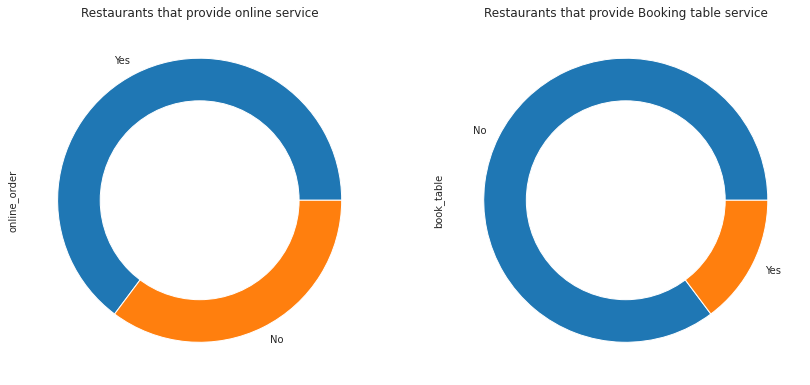

In [ ]:
# Proportion of Restaurants that provide online service
plt.rcParams['figure.figsize'] = 14,7
plt.subplot(1,2,1)
df.online_order.value_counts().plot(kind='pie')
w_circle=plt.Circle((0,0),0.7,color='white')
plt.title("Restaurants that provide online service")
p=plt.gcf()
p.gca().add_artist(w_circle)

plt.subplot(1,2,2)
# Proportion of restaurants that allow booking tables
plt.subplot(1,2,2)
df.book_table.value_counts().plot(kind='pie')
w_circle=plt.Circle((0,0),0.7,color='white')
plt.title("Restaurants that provide Booking table service")
p=plt.gcf()
p.gca().add_artist(w_circle)

The restaurants having online service & booking facility have higher average ratings than those restaurants who do not have

## 6) Impact of Online Ordering on Ratings

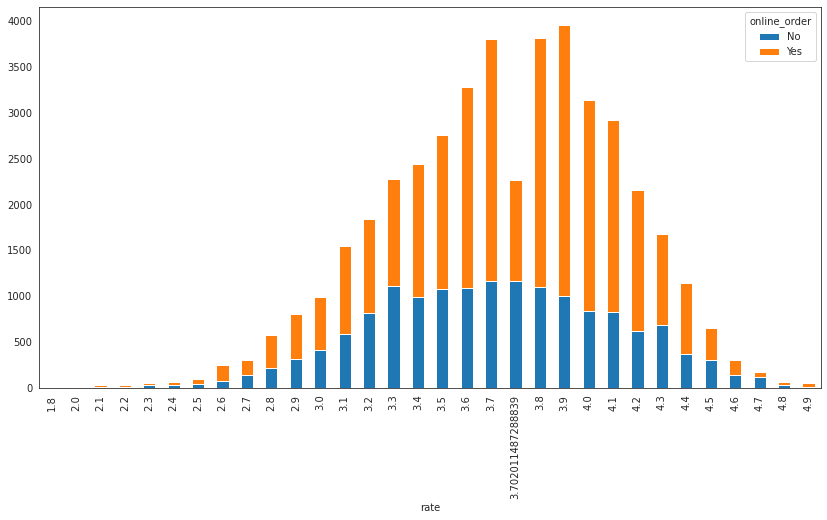

In [ ]:
# Impact of Online Ordering on Ratings
sns.set_style('white')
y=pd.crosstab(df.rate,df.online_order)
y.plot(kind='bar',stacked=True)


It can be seen from the chart below that restaurants that allow ordering online tend to have higher ratings

## 7) Impact of Table Booking on Ratings

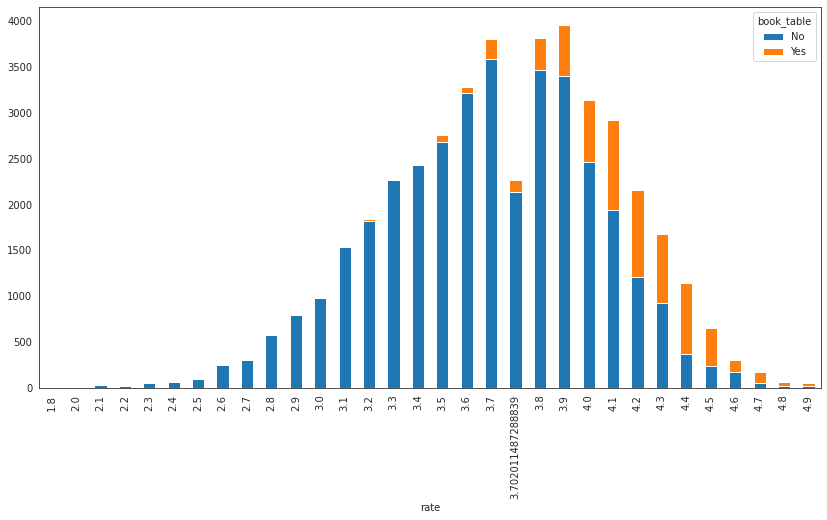

In [ ]:
# Impact of Table Booking on Ratings
sns.set_style('white')
y=pd.crosstab(df.rate,df.book_table)
y.plot(kind='bar',stacked=True)

It can be seen from the chart below that restaurants that allow table bookings tend to have higher ratings.

## 8) Visualizing Online Order Facility, Location Wise

Here, we are going to use pivot table which help us to analyze the two columns




                       name      
online_order             No   Yes
location                         
BTM                    1179  3031
Banashankari            308   497
Banaswadi               184   303
Bannerghatta Road       444   870
Basavanagudi            207   421
Bellandur               350   713
Brigade Road            466   618
Brookefield             178   401
Church Street           213   337
Commercial Street       173   136
Cunningham Road         156   319
Domlur                  199   227
Electronic City         420   535
Frazer Town             204   370
HSR                     370  1732
Indiranagar             583  1306
JP Nagar                634  1208
Jayanagar               423  1286
Kalyan Nagar            273   469
Kammanahalli            173   344
Koramangala 1st Block   196   768
Koramangala 4th Block   375   489
Koramangala 5th Block   807  1551
Koramangala 6th Block   425   663
Koramangala 7th Block   323   761


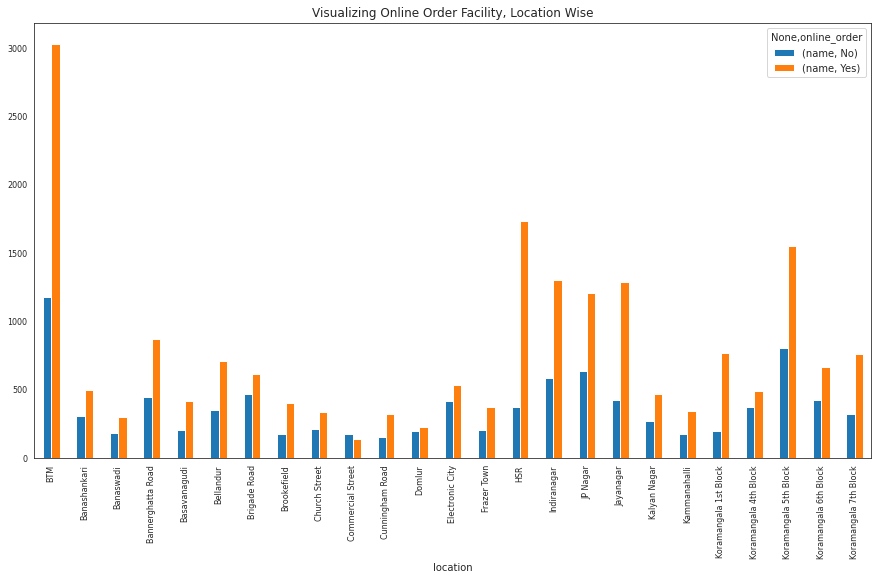

In [ ]:
df1 = df.groupby(['location','online_order'])['name'].count()[:50]
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')
df1 = pd.pivot_table(df1, values=None, index=['location'],columns=['online_order'], fill_value=0, aggfunc=np.sum)
print(df1)
df1.plot(kind = 'bar',fontsize=8, figsize = (15,8))
plt.title("Visualizing Online Order Facility, Location Wise")
plt.show()


##9) Visualizing Booking Table Facility, Location Wise

                       name     
book_table               No  Yes
location                        
BTM                    4044  166
Banashankari            743   62
Banaswadi               479    8
Bannerghatta Road      1216   98
Basavanagudi            612   16
Bellandur               965   98
Brigade Road            905  179
Brookefield             505   74
Church Street           368  182
Commercial Street       309    0
Cunningham Road         300  175
Domlur                  371   55
Electronic City         856   99
Frazer Town             566    8
HSR                    1886  216
Indiranagar            1435  454
JP Nagar               1533  309
Jayanagar              1434  275
Kalyan Nagar            593  149
Kammanahalli            468   49
Koramangala 1st Block   914   50
Koramangala 4th Block   542  322
Koramangala 5th Block  1666  692
Koramangala 6th Block   975  113
Koramangala 7th Block   920  164
Lavelle Road            261    0


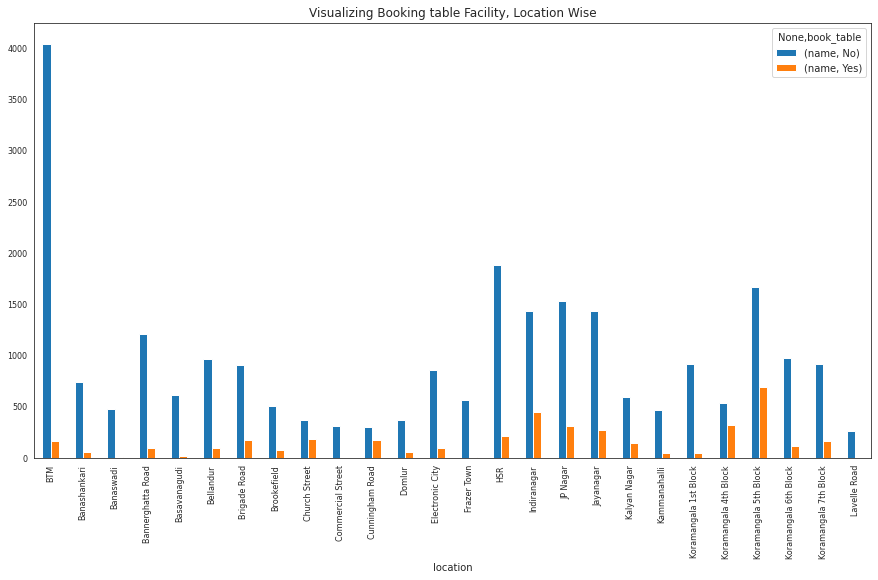

In [ ]:
df2 = df.groupby(['location','book_table'])['name'].count()[:50]
df2.to_csv('location_booktable.csv')
df2 = pd.read_csv('location_booktable.csv')
df2 = pd.pivot_table(df2, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)
print(df2)
df2.plot(kind = 'bar',fontsize=8, figsize = (15,8))
plt.title("Visualizing Booking table Facility, Location Wise")
plt.show()


 
*   From the above both graphs, we can say that BTM which already have large number of restaurants also the one of the locations who provide maximum online order facility.

*   But in the case of booking table facility there are very few restaurats in BTM who provide it.

*   So if someone wants to open a restaurant in BTM which is already the most popular residential and have large portion of restaurants....they should provide Booking table facility.



## Quality Over Quantity

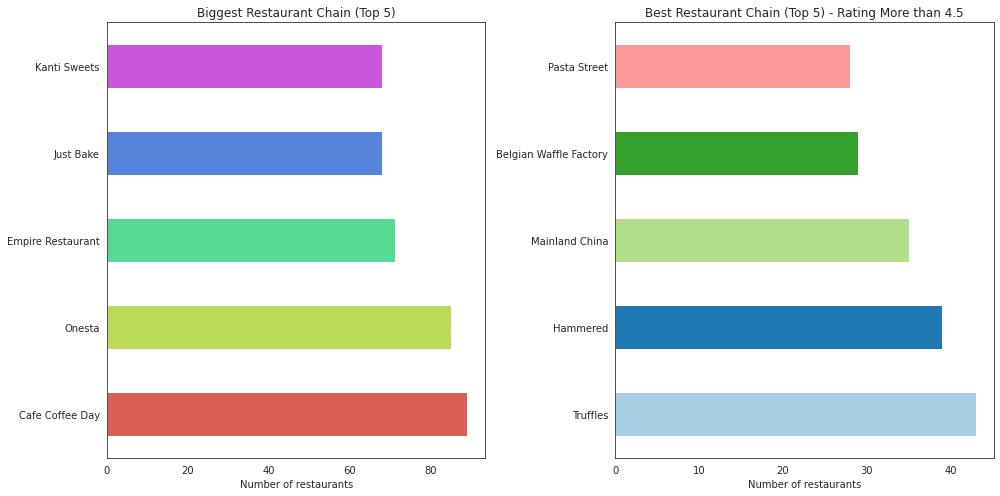

In [ ]:
# Biggest Restaurant Chain and Best Restaurant Chain
plt.rcParams['figure.figsize'] = 14,7
plt.subplot(1,2,1)
df.name.value_counts().head().plot(kind = "barh", color = sns.color_palette("hls", 5))
plt.xlabel("Number of restaurants")
plt.title("Biggest Restaurant Chain (Top 5)")

plt.subplot(1,2,2)
df[df['rate']>=4.5]['name'].value_counts().nlargest(5).plot(kind = "barh", color = sns.color_palette("Paired"))
plt.xlabel("Number of restaurants")
plt.title("Best Restaurant Chain (Top 5) - Rating More than 4.5")
plt.tight_layout()

### Cafe Coffee Day chain has over 80 cafes across the city that are listed in Zomato. On the other hand, Truffles – a burger chain has the best fast food restaurants (rating more than 4.5) which comes 1st in top 5 restaurants, So it perfectly defines our heading **quality over quantity**.

### So next time when you visit Bangalore or if you want to check out a good restaurant over a weekend don’t forget to try the food at Truffles, Hammered and Mainland China.



# **CONCLUSION**

In this project, we have learnt how to utilize matplotlib , pandas and seaborn  libraries to perform Exploratory Data Analysis on datasets & to create beautiful visualization for exploring the relationship between the variables

# **❄  ❄  ❄  THANKYOU  ❄  ❄  ❄**


---


